In [39]:
import pandas as pd
import numpy as np

In [40]:
df=pd.read_csv("Churn_Modelling.csv")

In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [43]:
df.shape

(10000, 14)

In [44]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [45]:
x=df[['CreditScore','Age','Tenure',	'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y=df['Exited']

In [10]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

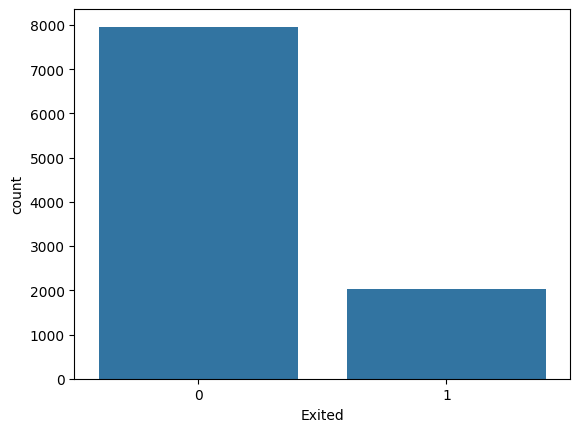

In [46]:
import seaborn as sns
sns.countplot(x=y)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)
x_scaled


array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [51]:
from sklearn.model_selection import train_test_split
col_name=['CreditScore','Age','Tenure',	'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
x_new=pd.DataFrame(x_scaled,columns=col_name)
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=1)

In [49]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier()

In [21]:
ann.fit(x_train,y_train)

C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [22]:
y_pred=ann.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8572

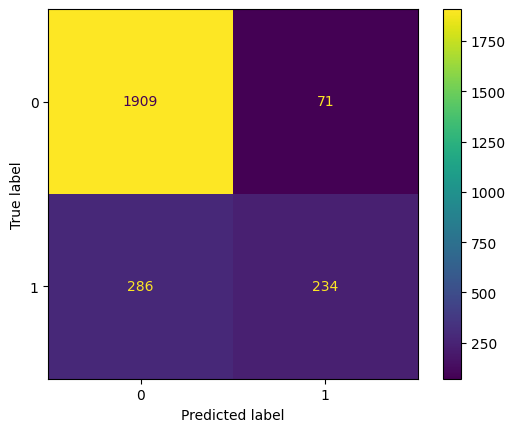

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1980
           1       0.77      0.45      0.57       520

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.74      2500
weighted avg       0.85      0.86      0.84      2500



In [30]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_res,y_res=ros.fit_resample(x,y)



In [32]:
scl=StandardScaler()
x_s=scl.fit_transform(x_res)
x_new=pd.DataFrame(x_s,columns=col_name)
x_train,x_test,y_train,y_test=train_test_split(x_s,y_res,test_size=0.25,random_state=1)

In [34]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier()
ann.fit(x_train,y_train)
y_pred=ann.predict(x_test)

C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
accuracy_score(y_test,y_pred)

0.7767453540934204

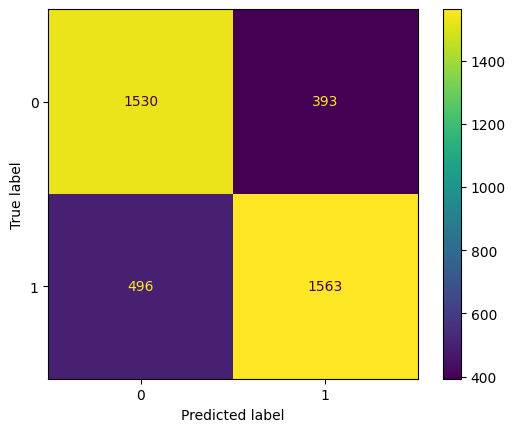

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.77      1923
           1       0.80      0.76      0.78      2059

    accuracy                           0.78      3982
   macro avg       0.78      0.78      0.78      3982
weighted avg       0.78      0.78      0.78      3982

